<html>
	<author>Hiroshi TAKEMOTO</author>
	(<email>take.pwave@gmail.com</email>)
	
	<h1>入門機械学習による異常検出</h1>
	<p>
		井出　剛著の「入門機械学習による異常検出」(以降、井出本と記す)の例題をSageを使ってお復習いします。
	</p>
</html>

<html>
	<h2>7章　時系列データの異常検知</h2>
	<p>
		この章でのポイントは、まだ勉強中
	</p>
</html>

<html>
	<h3>準備</h3>
	<p>
		いつものように必要なライブラリを読み込み、テストデータとしてRのMASSパッケージに含まれているUScribeを使用します。
	</p>
</html>

In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="css/sage_table_form.css">

In [2]:
# RとPandasのデータフレームを相互に変換する関数を読み込む
# Rの必要なライブラリ
r('library(ggplot2)')
r('library(jsonlite)')

# python用のパッケージ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# jupyter用のdisplayメソッド
from IPython.display import display, Latex, HTML, Math, JSON
# sageユーティリティ
load('script/sage_util.py')
# Rユーティリティ
load('script/RUtil.py')

In [3]:
# FNNライブラリをロード
r('library(FNN)')

 [1] "FNN"       "jsonlite"  "ggplot2"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
 [9] "methods"   "base"     

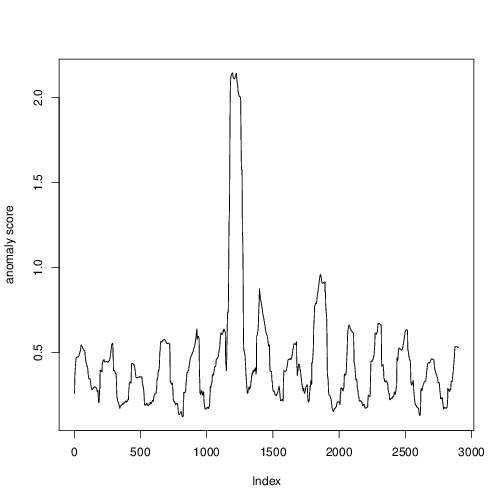

In [4]:
# Rの例題をそのまま実行
r('dt <- read.table(file="data/qtdbsel102.txt")' )
r('w <- 100; nk <- 1')
r('Xtr <- dt[1:3000, 2]; Dtr <- embed(Xtr, w)')
r('X <- dt[3001:6000, 2]; D <- embed(X, w)')
r('d <- knnx.dist(Dtr, D, k=nk); a <- d[,1]')
# グラフにプロット
graph = preGraph("fig7.1.pdf")
r('plot(a, ylab="anomaly score", type="l")')
postGraph(graph)

In [5]:
# embedのデータの生成方法を調べる
Dtr = sageobj(r('Dtr'))
Dtr 

2901 x 100 dense matrix over Real Double Field (use the '.str()' method to see the entries)

In [6]:
# embedは、100番目から降順にサンプリングしている！
Dtr[0] 

(4.83, 4.84, 4.855, 4.84, 4.83, 4.83, 4.845, 4.84, 4.83, 4.83, 4.845, 4.845, 4.845, 4.83, 4.85, 4.86, 4.85, 4.845, 4.86, 4.87, 4.86, 4.86, 4.875, 4.88, 4.87, 4.87, 4.89, 4.89, 4.885, 4.885, 4.885, 4.895, 4.89, 4.885, 4.88, 4.88, 4.87, 4.84, 4.835, 4.835, 4.815, 4.805, 4.785, 4.785, 4.77, 4.75, 4.73, 4.73, 4.73, 4.705, 4.695, 4.675, 4.68, 4.66, 4.65, 4.65, 4.66, 4.65, 4.635, 4.625, 4.65, 4.635, 4.625, 4.625, 4.645, 4.655, 4.64, 4.645, 4.665, 4.675, 4.65, 4.655, 4.675, 4.68, 4.66, 4.655, 4.675, 4.675, 4.66, 4.65, 4.66, 4.655, 4.635, 4.635, 4.645, 4.665, 4.68, 4.67, 4.67, 4.675, 4.685, 4.68, 4.675, 4.685, 4.695, 4.71, 4.75, 4.805, 4.82, 4.77)

In [7]:
# Dtr[1]は、101番目から降順に100個をサンプリングしている
Dtr[1] 

(4.835, 4.83, 4.84, 4.855, 4.84, 4.83, 4.83, 4.845, 4.84, 4.83, 4.83, 4.845, 4.845, 4.845, 4.83, 4.85, 4.86, 4.85, 4.845, 4.86, 4.87, 4.86, 4.86, 4.875, 4.88, 4.87, 4.87, 4.89, 4.89, 4.885, 4.885, 4.885, 4.895, 4.89, 4.885, 4.88, 4.88, 4.87, 4.84, 4.835, 4.835, 4.815, 4.805, 4.785, 4.785, 4.77, 4.75, 4.73, 4.73, 4.73, 4.705, 4.695, 4.675, 4.68, 4.66, 4.65, 4.65, 4.66, 4.65, 4.635, 4.625, 4.65, 4.635, 4.625, 4.625, 4.645, 4.655, 4.64, 4.645, 4.665, 4.675, 4.65, 4.655, 4.675, 4.68, 4.66, 4.655, 4.675, 4.675, 4.66, 4.65, 4.66, 4.655, 4.635, 4.635, 4.645, 4.665, 4.68, 4.67, 4.67, 4.675, 4.685, 4.68, 4.675, 4.685, 4.695, 4.71, 4.75, 4.805, 4.82)

In [8]:
# Sageとsklearnを使って同様の問題を解く
# トレーニングで学習したnbrsを作成
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1).fit(Dtr) 

In [9]:
# 検証用データでの距離を求める
D = sageobj(r('D'))
distances, indices = nbrs.kneighbors(D) 

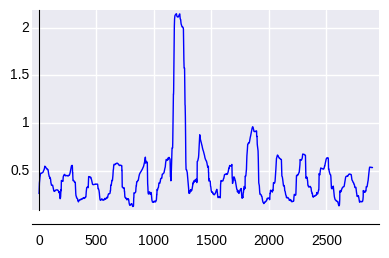

In [10]:
# グラフに表示
list_plot(distances, plotjoined =True, figsize=4) 

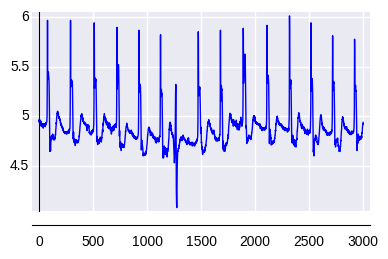

In [11]:
# 検証用に使用した心電図のデータ
X = sageobj(r('X'))
list_plot(X, plotjoined =True, figsize=4) 